This is a note to explore daily returns from a Cryptocurrency Dataset.
Data sample set provided by Kaggle

In [58]:
#import modules for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [132]:
#create the dataframe
df=pd.read_csv('crypto_coin_data.csv', parse_dates=['Date'])
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,2019-12-02,1.25,1.26,1.2,1.24,"27,574,097","817,872,179"
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [133]:
# numeric data importing as objects due to commas in formatting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  object        
 3   High        28944 non-null  object        
 4   Low         28944 non-null  object        
 5   Close       28944 non-null  object        
 6   Volume      28944 non-null  object        
 7   Market Cap  28944 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.8+ MB


In [134]:
# cleaning the data
numeric=['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

for col in numeric:
    df[col]=df[col].str.replace(',','')
    df[col]=df[col].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


In [135]:
# We can now view some descriptive stats
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,28944.000000,28944.000000,28944.000000,28944.000000,2.894400e+04,2.894400e+04
mean,300.719915,309.832983,290.858557,300.947534,8.133058e+08,7.194826e+09
std,1373.884681,1416.598573,1325.072633,1374.461221,3.059516e+09,2.469322e+10
min,0.001352,0.001509,0.001227,0.001357,0.000000e+00,0.000000e+00
25%,0.205108,0.212444,0.196527,0.205347,2.418700e+05,6.345143e+07
50%,2.995000,3.090000,2.880000,2.980000,5.212684e+06,3.453673e+08
75%,24.430000,25.530000,23.270000,24.430000,1.554764e+08,3.422403e+09
max,19475.800000,20089.000000,18974.100000,19497.400000,5.350913e+10,3.265025e+11


Some Questions to Answer
1) Which currency has had the best returns over the sample period?\
2) Which currencies were the most/least volatile?\
3) What was the average price of each of the currencies during the sample period?\
4) Which currencies had the highest/lowest average volumes during the sample period?\
5) Which currencies saw the most growth in terms of trading volumes over the sample period?\
6) Which currencies are the most highly correlated?\
7) Which currencies saw the most growth in terms of % of the total market?\

(17167.0, 18262.0)

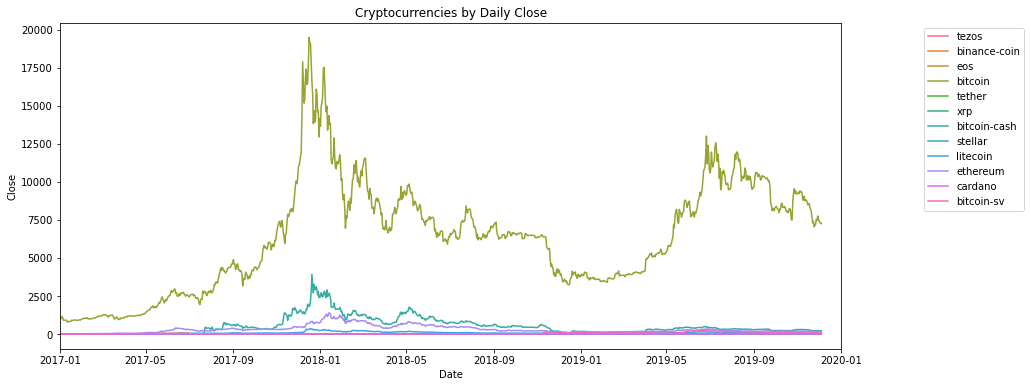

In [136]:
# Question #1 (Plot)
plt.figure(figsize=(14,6))
plt.title('Cryptocurrencies by Daily Close')
sns.lineplot(x=df['Date'], y=df['Close'], hue=df['Currency'], data=pd.melt(df, ['Date']))
plt.legend(bbox_to_anchor=(1.1, 1), loc=2)
plt.xlim(dt.datetime(2017,1,1), dt.datetime(2020,1,1))
#Bitcoin had the best returns

In [46]:
# Question #2 (Average Volatility)
df.groupby('Currency')['Close'].var()

Currency
binance-coin    7.699766e+01
bitcoin         1.421620e+07
bitcoin-cash    2.093937e+05
bitcoin-sv      1.782723e+03
cardano         2.934140e+01
eos             4.402286e+01
ethereum        6.324309e+04
litecoin        2.793550e+03
stellar         2.928576e+01
tether          4.506973e+02
tezos           2.855265e+01
xrp             4.553239e+02
Name: Close, dtype: float64

In [47]:
# Question #3 (Average Price)
df.groupby('Currency')['Close'].mean()

Currency
binance-coin       8.973781
bitcoin         3023.498777
bitcoin-cash     232.854936
bitcoin-sv        23.510593
cardano            1.963220
eos                6.201109
ethereum         263.434610
litecoin          36.802939
stellar            1.977733
tether             5.072494
tezos              2.550739
xrp                4.529477
Name: Close, dtype: float64

In [54]:
# Question #4 (Trading Volumes)
MeanVol=df.groupby('Currency')['Volume'].mean().sort_values(ascending=False) #Max Volume >>Sort highest to lowest

MeanVol
#Bitcoin on average had the highest volumes while Tezos had the lowest

Currency
bitcoin         3.599158e+09
tether          2.859902e+09
ethereum        1.429437e+09
litecoin        5.101558e+08
eos             4.251962e+08
bitcoin-cash    3.622093e+08
xrp             3.488055e+08
bitcoin-sv      6.945699e+07
binance-coin    5.626652e+07
stellar         5.515177e+07
cardano         4.004766e+07
tezos           3.883308e+06
Name: Volume, dtype: float64

(17167.0, 18262.0)

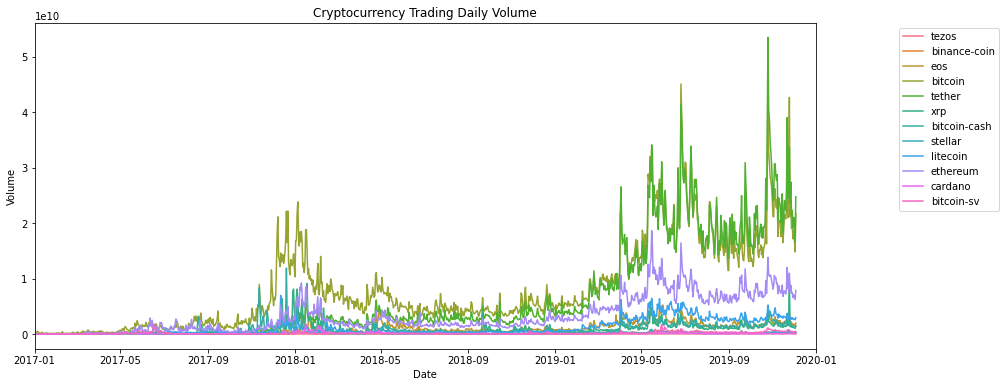

In [137]:
#Question #5 (Trading over time)
plt.figure(figsize=(14,6))
plt.title('Cryptocurrency Trading Daily Volume')
sns.lineplot(x=df['Date'], y=df['Volume'], hue=df['Currency'], data=pd.melt(df, ['Date']))
plt.legend(bbox_to_anchor=(1.1, 1), loc=2)
plt.xlim(dt.datetime(2017,1,1), dt.datetime(2020,1,1))
#Both Tether and Bitcoin saw huge spikes in volume over the course of the last few years.

In [166]:
#Correlation of Returns

#limiting data to returns since 2017
start = '2017-01-01'
end = '2019-12-01'

returns=df[['Currency', 'Date', 'Close']].copy()
returns.set_index(['Date'], inplace=True)
returns['pct_change']=returns.Close.pct_change(periods=-1)
returns.sort_index(inplace=True)
returns=returns.loc[start:end]
returns.head()

,Currency,Close,pct_change
Date,,,
2017-01-01,eos,4.510000,0.041570
2017-01-01,bitcoin,998.330000,0.035891
2017-01-01,cardano,0.002481,0.004860
2017-01-01,ethereum,8.170000,0.025094
2017-01-01,binance-coin,4.510000,0.041570


(-0.5, 0.5)

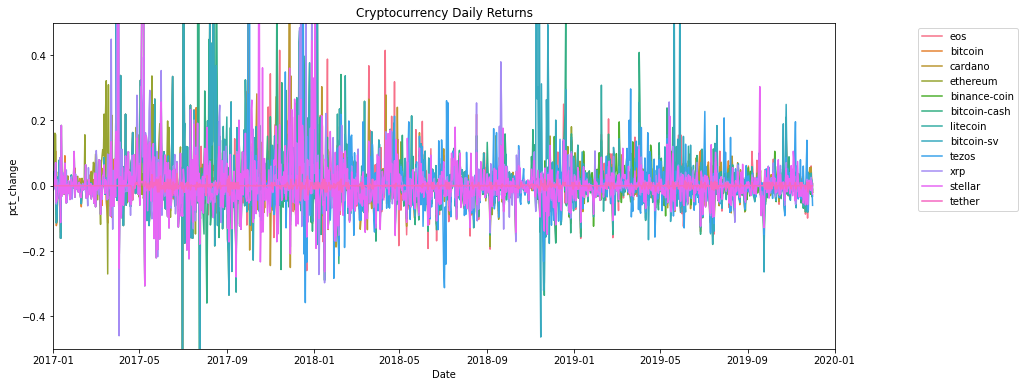

In [169]:
#Plotting the results
returns.reset_index(inplace=True)

plt.figure(figsize=(14,6))
plt.title('Cryptocurrency Daily Returns')
sns.lineplot(x=returns['Date'], y=returns['pct_change'], hue=returns['Currency'], data=pd.melt(returns, ['Date']))
plt.legend(bbox_to_anchor=(1.1, 1), loc=2)
plt.xlim(dt.datetime(2017,1,1), dt.datetime(2020,1,1))
plt.ylim(-0.5, 0.5)

#Highly correlated and volatile returns across different currencies

In [175]:
#Question 7
df['Year']= pd.DatetimeIndex(df['Date']).year #adding a year column
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Year
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,2019
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,2019
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,2019
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,2019
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,2019


In [191]:
#creating a groupby object to chart
Yearly_Volumes=df.groupby(['Currency','Year']).agg(avg_mkt_cap=('Market Cap', 'mean')).reset_index()
Yearly_Volumes.head()

,Currency,Year,avg_mkt_cap
0,binance-coin,2013,1.501127e+08
1,binance-coin,2014,2.754614e+08
2,binance-coin,2015,1.100210e+08
3,binance-coin,2016,1.764565e+08
4,binance-coin,2017,4.800223e+08


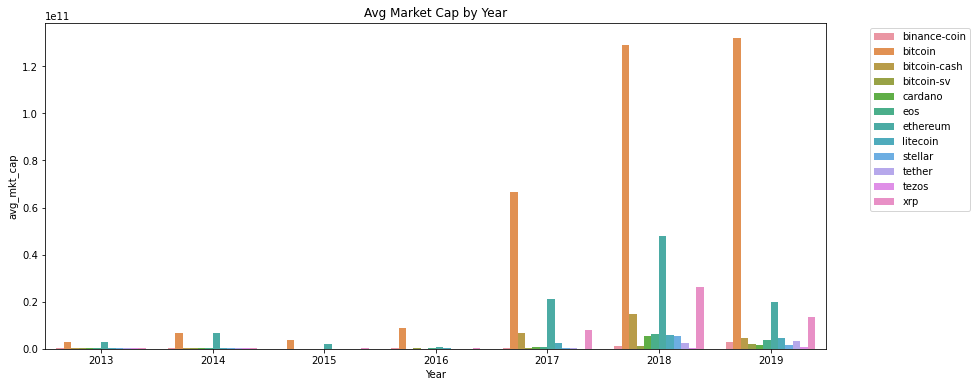

In [203]:
#Market Cap Comparison
plt.figure(figsize=(14,6))
plt.title('Avg Market Cap by Year')
sns.barplot(x='Year', y='avg_mkt_cap', hue='Currency', data=Yearly_Volumes)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [200]:
# Narrowing this down to only the top currencies and the last few years.
Currencies=['bitcoin', 'ethereum', 'tether']

mask1=Yearly_Volumes.Currency.isin(Currencies)
mask2=Yearly_Volumes.Year>=2017
target=Yearly_Volumes[mask1 & mask2]
target


,Currency,Year,avg_mkt_cap
11,bitcoin,2017,6.645752e+10
12,bitcoin,2018,1.292673e+11
13,bitcoin,2019,1.319586e+11
46,ethereum,2017,2.116943e+10
47,ethereum,2018,4.797184e+10
48,ethereum,2019,1.977655e+10
67,tether,2017,2.897361e+08
68,tether,2018,2.275525e+09
69,tether,2019,3.209865e+09


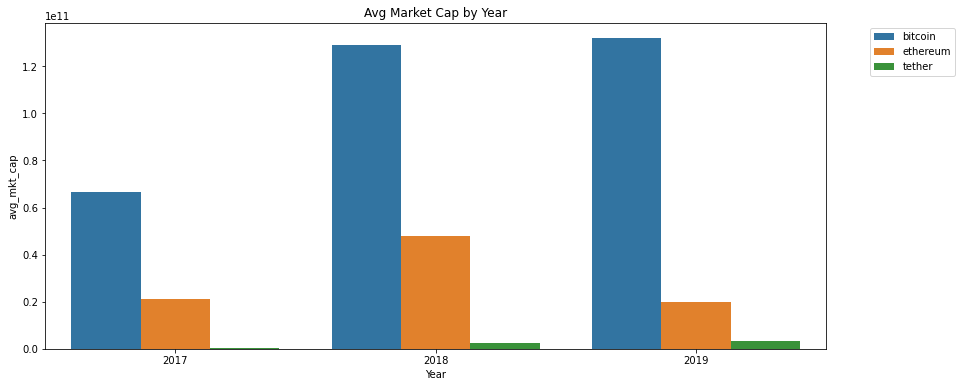

In [202]:
#replotting to get a feel for the marketshare
plt.figure(figsize=(14,6))
plt.title('Avg Market Cap by Year')
sns.barplot(x='Year', y='avg_mkt_cap', hue='Currency', data=target)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

#Bitcoin and Ethereum are by far the most owned currencies, with none of the others even coming close.